# Statement of the problem

Given a model for the evolution of the stock price, we would
like to find an **optimal strategy** for trading stock, the strategy
that **minimizes some cost function** over all permissible strategies.

We will **focus on the case of stock liquidation** where the initial position $x_0=X$ and the final position $x_T=0$.  

A **static** strategy is one determined in advance of trading while a **dynamic** strategy is one that depends on the state of the market during execution of the order. For instance, **delta-hedging** is an example of a dynamic strategy and **VWAP** is an example of a static strategy.

# I. The mathematics behind the problem

Let's first begin with the **Euler-Lagrange equation**

We define a trading trajectory to be a list $x_0, …, x_n$ where $x_k$ is the number of
units that we plan to hold at time $𝑡_k$ is. Our initial holding is $x_0 = X$, and
liquidation at time $T$ requires $x_n = 0$. We can extend this definition to a continuous $x_t$.

Suppose that the strategy $x_t$ minimizes the cost functional

$$\mathcal{C} [x,\dot x]=\int_0^T\,L(t,x_t,\dot x_t)\,dt$$ 

with boundary conditions $x_0=0$, $x_T=X$ (assume we are acquiring $X$ shares). 

Let $\eta$ be a perturbation with $\eta(0)=\eta(T)=0$.
The first order criterion for optimal strategy is:

$$\left.\frac{d}{d\epsilon}\right|_{\epsilon=0}C[x+\epsilon\,\eta,\dot x + \epsilon\,\dot \eta]=0.$$


Computing this derivative without the explicit dependence on
$t$ gives us,

\begin{eqnarray*}
\left.\frac{d}{d\epsilon}\right|_{\epsilon=0}C &=& \int_0^T\,\left\{\frac{\partial L}{\partial x}\,\eta+\frac{\partial L}{\partial\dot x}\,\dot \eta\right\}\,dt \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}\,\eta - \int_0^T \frac{d}{dt}\frac{\partial L}{\partial\dot x}\,\dot \eta\right\}\,dt + \left.\frac{\partial L}{\partial\dot x}\,\eta\right|_{t=0}^T  \quad (\mbox{by applying integration by parts}) \\
&=& \int_0^T\,\left\{\frac{\partial L}{\partial x}-\frac{\partial}{\partial t}\frac{\partial L}{\partial\dot x}\right\}\,\eta\,dt \quad (\mbox{since } \eta(0) = \eta(T) = 0)
\end{eqnarray*}

Since, this must hold for any perturbation $\eta$ with
$\eta(0)=\eta(T)=0$, we deduce from **the fundamental lemma of calculus of variations**



The Euler-Lagrange equation is thus:

$$\frac{\partial}{\partial t}\,\left(\frac{\partial L}{\partial {\dot x} }\right)-\frac{\partial L}{\partial {x} }=0$$


### Stochastic control problem

A stochastic control problem is a *control problem* which aims to minimize certain expected costs among all admissible controls. 

We have the following notations: 

* $g$ is the *terminal cost* 

* $h$ is the *running cost*

* the state variable $X^{(v)}_t$ is driven by the controlled SDE

    $$
      dX^{(v)}_t = \mu( t,X^{(v)}_t, v_t) dt + \sigma(t,X^{(v)}_t, v_t) dW_t.
    $$
    
* $\mu( t,X^{(v)}_t, v_t) $ is the drift of our variable

* $\sigma(t,X^{(v)}_t, v_t)$ is the volatility of our state variable

* $\mathcal G[0,T]$ is the collection of admissible controls in the time interval $[0,T]$ 


We have the following **Stochastic Control Problem**
$$
  \max_{v\in\mathcal G[0,T]} \mathbb E \left[g(X^{(v)}_T) + \int_0^T h(s,X^{(v)}_s,v_s) ds \right]
$$

### Value function 

* For a given admissible control $v\in\mathcal G[t,T]$, we define the **expected objective functional** $J^{(v)}$ as
    
    $$
      J^{(v)}(t,x) = \mathbb E\left[\left. g(X^{(v)}_T) + \int_0^T h(s,X^{(v)}_s,v_s) ds \right| X_t = x \right].
    $$


* The **value function** $J(t,x)$ for a stochastic control problem is defined as

    $$
      J(t,x) = \max_{v\in\mathcal G[t,T]} J^{(v)}(t,x).
    $$


* The value function $J(t,x)$ is the **optimal value of the control problem** conditioned on the process starting at $(t,x)$ and applying the optimal control thereafter.

### Bellman’s principle of optimality

**Principle of optimality** :“An optimal policy has the property that whatever the initial state and
initial decision are, the remaining decisions must constitute an optimal
policy with regard to the state resulting from the first decision.”

The Bellman's principle can be rephrased in terms of value function as follow. For any $0 < \epsilon < T -t$,

$$
J(t,x) = \max_{v\in\mathcal G[t,t+\epsilon]} \mathbb E\left[\left. \int_t^{t+\epsilon} h(s,X^{(v)}_s,v_s) ds + J(t+\epsilon,X^{(v)}_{t+\epsilon}) \right| \mathcal F_t \right].
$$

### The Hamilton-Jacobi-Bellman (HJB) equation

The value function $J$ satisfies the terminal value problem

$$
\partial_t J(t,x) + \max_{v\in\mathcal G[t]} \{\mathcal L^{(v)} J(t,x) + h(t,x,v) \} = 0, \mbox{ for } t < T
$$

with terminal condition

$$
  J(T,x) = g(x),
$$

where $\mathcal L^{(v)} := \frac{\sigma^2}2 \partial_x^2 + \mu \partial_x$ is the associated infinitesimal generator of the controlled process 

$$
dX^{(v)}_t = \mu( t,X^{(v)}_t, v_t) dt + \sigma(t,X^{(v)}_t, v_t) dW_t.
$$



* The HJB equation is an infinitesimal version of the Bellman's principle. 

* The optimal control is given implicitly in terms of the value function $J$.


### Differences between a deterministic and a stochastic optimal control

-   In **deterministic** optimal control, the evolution
    of the state vector is deterministic.

-   In **stochastic** optimal control, the evolution of
    the state vector is stochastic.

# II. Almgren and Chriss

Almgren and Chriss' paper treats the execution of a trade order as a **tradeoff between risk and execution cost**.

-   *The faster an order is executed, the higher the execution cost*

-   *The faster an order is executed, the lower the risk (which is increasing in position size).*


For simplicity, we consider liquidation of an existing position $X$, but we could also consider the creation of a new position.

We denote the position at time $t$ by $x_t$ with $x_0=X$ and $x_T=0$ (initial boundary conditions).

Almgren and Chriss's paper models **market impact** and **slippage** (the difference between the expected price of a trade and the price at which the trade is actually executed) as follows. 

The stock price $S_t$ is described by the following equation: 

$$dS_t=\gamma\,dx_t+\sigma\,dZ_t$$

and we note the price at which transactions occur $\tilde S_t$ that is given by

$$\tilde S_t = S_t - \eta\,v_t$$

where $v_t:=-{\dot x}_t$ is the speed at which we are trading.

### P&L and cost of trading of a trading strategy

Let $x_t$ be a trading strategy. The corresponding P&L (up to time $t$), denoted by $\Pi_t(x)$, is identified as 

$$
\Pi_t(x) := x_t (S_t - S_0) + \int_0^t (S_0 - \tilde S_\tau) d x_\tau.
$$

- The first term represents the potential cost of shares that are yet to be transacted.

- The second term corresponds to the monetary value from the shares that have been transacted up to time $t$.

- Obviously, should there be no trade in the time interval $[0,t]$, i.e., $x_s = X$ for all $s \in [0,t]$, the P&L reads $\Pi_t(x) = X (S_t - S_0)$; reflecting the P&L from the price movement of the stock.

#### <font color=blue>Implementation shortfall as cost of trading </font>

Negative P&L is also referred to as the *implementation shortfall*, which will be used as the cost of trading, denoted by $C$ hereafter.



### P&L in Almgren-Chriss model

Note that, at the end of execution period $T$, the P&L reads
$$
  \Pi_T(x) = x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u,
$$
should there be $x_T$ shares yet to be transacted. Hence, in Almgren-Chriss model 

\begin{eqnarray*}
\Pi_T(x) &=& x_T (S_T - S_0) + \int_0^T (S_0 - \tilde S_u) d x_u \\
&=& \int_0^T [- \gamma (x_u - X) - \sigma W_u + \eta v_u] d x_u \quad (\mbox{note that } x_T = 0) \\
&=& -\frac\gamma2 X^2 + \sigma \int_0^T x_u d W_u - \eta \int_0^T v_u^2 du \quad (\mbox{Integration by parts}).
\end{eqnarray*}
Therefore, the expected cost corresponding to the trading strategy $x$ is given by  
\begin{eqnarray*}
&& \mathbb E\left[C_T(x)\right] = \frac\gamma2 X^2 + \eta \int_0^T \mathbb E [v_u^2] du.
\end{eqnarray*}

### An observation from Predoiu, Shaikhet and Shreve

Suppose the cost associated with a strategy depends on the stock price
only through the term 

$$\int_0^T\,S_t\,dx_t.$$

with $S_t$ a martingale.
Integration by parts gives

$$\mathbb{E} \left[\int_0^T\,S_t\,dx_t\right]=\mathbb{E} \left[S_T\,x_T-S_0\,x_0-\int_0^T\,x_t\,dS_t\right]=-S_0\,X$$

which is independent of the trading strategy and we may proceed as if
$S_t=0$.



### Corollary

-   <span>This observation enables us to easily determine whether or not
    a statically optimal strategy will be dynamically optimal.</span>

    -   <span>In particular, if the price process is of the form
        $$S_t=S_0+\text{ impact of prior trading} +\text {noise},$$ and
        if there is no risk term, a statically optimal strategy will be
        dynamically optimal.</span>

    -   <span>If there is a risk term independent of the current stock
        price, a statically optimal strategy will again be dynamically
        optimal.</span>



### Expected cost of VWAP in the Almgren and Chriss model

For a VWAP, $v_t=X/T$ where $X$ is the total trade size and $T$ is the
duration of the order.

\begin{eqnarray*}
\mathbb E[C_T(x)] &=& \mathbb E\left[\frac\gamma2 X^2 - \sigma \int_0^T x_u d W_u + \eta \int_0^T \left(\frac XT\right)^2 du \right] \\
&=& \frac\gamma2 X^2 + \eta \frac{X^2}T \\
&=& \left(\frac\gamma2 + \frac\eta{T}\right)X^2.
\end{eqnarray*}

The cost per share of executing an order using VWAP is therefore

$$\hat{C}=\left(\frac\gamma2 + \frac\eta{T}\right)X$$

which is linear in the trade
size $X$ and inversely proportional to the duration of the order.

### The optimal strategy of a risk neutral trader

For a risk neutral trader whose objective is to minimize his total cost, the optimal control problem reads 

\begin{eqnarray*}
&& \min_{v} \mathbb E\left[C_T(x)\right] \\
&=& \min_{v} \left\{\frac\gamma2 X^2 + \eta \int_0^T \mathbb E[v_u^2] du \right\} \\
&=& \frac\gamma2 X^2 + \eta \min_v \int_0^T \mathbb E[v_u^2] du,
\end{eqnarray*}

where the state variable $x_t$ is driven by $dx_t = -v_t dt$ with the constraints $x_0 = X$ and $x_T = 0$.   
Note that, since $S_t$ is not involved in the last expression, we end up with a deterministic control problem which can be solved by the solution to its assocated HJB equation or, due to the simplicity of the dynamics of $x_t$, further reduced to a variational problem. 

### Variational problem 

$$\min_v \int_0^T\,v_t^2\,dt$$

with $v_t=-\dot x_t$ and $x_0 = X$, $x_T = 0$. 

The Euler-Lagrange equation is then

$$\partial_t v_t=-\partial_{t,t} x_t=0$$

with boundary conditions
$x_0=X$ and $x_T=0$ and the solution is obviously

$$v_t=\frac{X}{T};\, x_t=X\,\left(1-\frac{t}{T}\right)$$

### Adding a risk term

Almgren and Chriss add a risk term that penalizes the approximate variance
of the trading cost. They claim 

$$Var \left[\int_0^T\,x_t\,dS_t\right] \approx \sigma^2\,\int_0^T\,x_t^2\,dt$$

In fact, by It&ocirc;'s isometry, it is an equality if $x_t$ is deterministic. 

The expected risk-adjusted cost is then given by (temporarily ignore the path independent term $\frac\gamma2 X^2$)

$$\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$$

for some price of risk $\lambda$.

-   <span>Note the analogies to physics and portfolio theory.</span>

    -   <span>The first term looks like kinetic energy and the second
        term like potential energy.</span>

    -   <span>The expression looks like the objective in mean-variance
        portfolio optimization.</span>

The Euler-Lagrange equation becomes $$\ddot x- \kappa^2\,x=0$$ with
$$\kappa^2=\frac{\lambda\,\sigma^2}{\eta}$$ The solution is a linear
combination of terms of the form $e^{\pm \kappa t}$ that satisfies the
boundary conditions $x_0=X$, $x_T=0$. The solution is then

<font color="red">
<span>Almgren-Chriss optimal strategy</span>


$$x(t)=X\,\frac{\sinh \kappa (T-t)}{\sinh \kappa T}$$



<font color="black">
Once again, this statically optimal solution is dynamically optimal.

### Deterministic control problem

The problem of minimizing expected risk-adjusted cost can be recast as the following deterministic (since $S_t$ is not involved) control problem 

$$\min_v \left\{\eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt \right\}$$

with state vairable $x_t$ driven by $dx_t = -v_t dt$ and $x_0 = X$. Similar to the stochastic case, the value function $J$ is defined by

$$
J(t,x) = \min_{v\in\mathcal G[t,T]} \left\{\eta\,\int_t^T\,{\dot x}_t^2\,dt + \lambda\,\sigma^2\,\int_t^T\,x_t^2\,dt \right\}
$$

with $x_t = x$.

### The HJB equation

The HJB equation reads


$$\frac{\partial J}{\partial t} + \lambda\,\sigma^2\,x^2 + \min_{v \in \mathcal{G}}\left\{-v J_x + \eta\,v^2\right\}=0.$$

The optimal choice of $v$ is $$v^* = \frac{J_x}{2\eta}.$$
Substituting back int the HJB equation, we have 


$$\frac{\partial J}{\partial t} + \lambda \sigma^2 x^2 - \frac{J_x^2}{4\eta} = 0$$

which we solve by imposing  $J(t,x) = a(t) x^2$.

#### Remark
To take into account the terminal condition that $x_T = 0$, we set the terminal condition for the HJB equation as 

$$\lim_{t\uparrow T}J(t,x)=\begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

### Solution to HJB equation 

By substituting $J(t,x) = a(t)x^2$ into the HJB equation, we obtain 

$$
a' x^2 + \lambda \sigma^2 x^2 - \frac{(2ax)^2}{4\eta} = 0. 
$$

Setting the coefficient of $x^2$ equal to zero yields the ODE for $a$:

$$
a' + \lambda \sigma^2 - \frac{a^2}\eta = 0.
$$

Taking into account the terminal condition, we obtain the unique solution for $a$ as

$$
a(t) = \kappa \eta \coth(\kappa(T-t)).
$$

### Optimal strategy

The optimal trading rate $v^*$ is obtained via the value function $J$ as

$$
v_t^* = \frac{J_x}{2\eta} = \frac{a(t)}{\eta} x^*_t = \kappa \coth(\kappa(T-t)) x_t^*.
$$

Finally, recall that $v_t = -\dot x_t$, by solving the ODE 

$$
-\dot x_t = \kappa \coth(\kappa(T-t)) x_t
$$

with initial conditional $x_0 = X$, we obtain the Almgren-Chriss solution 

$$
x_t^* = X \frac{\sinh \kappa (T-t)}{\sinh \kappa T}.
$$

### What happens if we change the risk term?

Suppose we penalize average VaR instead of variance. This choice of risk
term has the particular benefit of being linear in the position size.
The expected risk-adjusted cost is then given by

$$C = \eta\,\int_0^T\,{\dot x}_t^2\,dt + \lambda\,\sigma\,\int_0^T\,x_t\,dt$$

for some price of risk $\lambda$.

The Euler-Lagrange equation becomes 

$$\ddot x- A=0$$

with

$$A=\frac{\lambda\,\sigma}{2\,\eta}$$

The solution is a quadratic of the form $A\,t^2/2+B \,t + C$ that
satisfies the boundary conditions $x_0=X$, $x_T=0$. The solution is then


$$x(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right)$$

In contrast to the previous case where the cost function is monotonic
decreasing in the trading rate and the optimal choice of liquidation
time is $\infty$, in this case, we can compute an optimal liquidation
time.

When $T$ is optimal, we have
$$\frac{\partial C}{\partial T}\propto {\dot x}_T^2 + A\,x_T=0$$ from
which we deduce that $\dot x_T=0$.

Substituting and solving for the optimal time
$T^\star$ gives $$T^\star=\sqrt{\frac{2\,X}{A}}$$

With this optimal choice $T=T^\star$, the optimal strategy becomes

\begin{eqnarray*}
x(t)&=&X\,\left(1-\frac{t}{T}\right)^2\\
u(t)&=&-\dot x(t)=2\,X\,\left(1-\frac{t}{T}\right)\end{eqnarray*}

Again, the static strategy is dynamically optimal, independent of the
stock price.

### ABM vs GBM

-   One of the reasons that the statically optimal strategy is
    dynamically optimal is that the stock price process is assumed to be
    arithmetic Brownian motion (ABM).

-   If for example geometric Brownian motion (GBM) is assumed, the
    optimal strategy depends on the stock price.
    
   

-   How dependent is the optimal strategy on dynamical assumptions for
    the underlying stock price process?


**Almgren Chriss algorithm**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
figure2_params = {'X':       10**6,         # shares
                  'T':       5,             # days
                  'N':       5,
                  'sigma':   0.95,          # dollars per share per day sqrt
                  'epsilon': 0.0625,        # dollars per share
                  'gamma':   2.5*10**(-7),  # dollars per share squared
                  'eta':     2.5*10**(-6),  # dollars per day
                  'lbda':    2*10**(-6)}

In [3]:
def _eta_tilde(eta, gamma, tau):
    return eta*(1 - (gamma*tau)/(2*eta))


def _kappa_tilde_squared(lbda, sigma, eta_tilde):
    return lbda*(sigma**2)/eta_tilde


def _kappa(kappa_tilde_squared, tau):
    return np.arccosh(kappa_tilde_squared*(tau**2)/2 + 1)/tau


def derived_params(eta, gamma, tau, lbda, sigma):
    eta_tilde = _eta_tilde(eta, gamma, tau)
    kappa_tilde_squared = _kappa_tilde_squared(lbda, sigma, eta_tilde)
    kappa = _kappa(kappa_tilde_squared, tau)

    return eta_tilde, kappa


def almgren_chriss(big_x, big_n, big_t, sigma, lbda, eta, gamma):
    tau = big_t/big_n
    eta_tilde, kappa = derived_params(eta, gamma, tau, lbda, sigma)

    t_j = np.linspace(0, big_t, big_n + 1)
    inventory_values = big_x*np.sinh(kappa*(big_t - t_j))/np.sinh(kappa*big_t)

    return pd.Series(inventory_values, t_j)

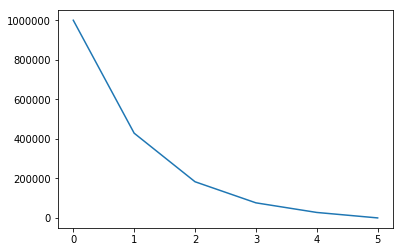

In [4]:
big_x = figure2_params['X']
big_n = figure2_params['N']
big_t = figure2_params['T']
sigma = figure2_params['sigma']
eta = figure2_params['eta']
gamma = figure2_params['gamma']
lbda = figure2_params['lbda']

trajectory = almgren_chriss(big_x, big_n, big_t, sigma, lbda, eta, gamma)
trajectory.plot('line')


In [73]:
def costOpt(kappa, T):
    return (0.25*kappa/((np.sinh(kappa*T))**2)*(2*kappa*T + np.sinh(2*kappa*T)))

def riskOpt(kappa, T):
    return (0.25*kappa/((np.sinh(kappa*T))**2)*(-2*kappa*T + np.sinh(2*kappa*T)))

In [74]:
def costVWAP(kappa, T):
    return (1/T)

def riskVWAP(kappa, T):
    return ((kappa**2)*T/3)

In [75]:
tau = big_t/big_n
kappa=derived_params(eta, gamma, tau, lbda, sigma)[1]
kappa

0.8462971345012562

Text(0.5,1,u'Efficient frontier in the Almgren Chriss model')

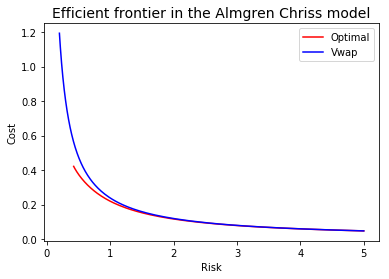

In [84]:
time = np.linspace(0.2,5, 200)

X= costOpt(kappa,time)
Y= riskOpt(kappa,time)
W= costVWAP(kappa,time)
Z= riskVWAP(kappa,time)

plt.plot(X,Y,label="Optimal",c='r',lw=1.5)
plt.plot(W,Z,label="Vwap",c='b',lw=1.5)

plt.xlabel("Risk")
plt.ylabel("Cost")
plt.legend(loc='best') 
plt.title("Efficient frontier in the Almgren Chriss model", fontsize=14)


**Optimal Execution Horizon algorithm** 

Implementation d'un autre algorithme que j'ai trouvé online (peut être intéressant, peut être à jeter), je le laisse la pour le moment

In [12]:
# PARAMETERS
sigma=1000
volSigma=10000
S_S=10000
zLambda=-1.644853627 #CDF(0.05) from the Std Normal dist
vB=0.4
phi=0.999
m=1000

In [13]:
def signum(int):
    if(int < 0):return -1
    elif(int > 0):return 1
    else:return 0

In [14]:
def getOI(v,m,phi,vB,sigma,volSigma):
    return phi*(float(m-(2*vB-1)*abs(m))/v+2*vB-1)+ (1-phi)*(2*vB-1)

In [15]:
def getBounds(m,phi,vB,sigma,volSigma,S_S,zLambda,k=0):
    vB_l=float(signum(m)+1)/2-zLambda*sigma*abs(m)**0.5/ float(4*phi*(S_S+abs(m)*k)*volSigma**0.5)
    vB_u=float(signum(m)+1)/2+zLambda*sigma*abs(m)**0.5/ float(4*phi*(S_S+abs(m)*k)*volSigma**0.5)
    vB_z=(signum(m)*phi/(float(phi)-1)+1)/2.
    return vB_l,vB_u,vB_z

In [16]:
def minFoot(m,phi,vB,sigma,volSigma,S_S,zLambda,k=0):
    
    vB_l,vB_u,vB_z=getBounds(m,phi,vB,sigma,volSigma,S_S, zLambda,k)

 
    if (2*vB-1)*abs(m)<m:
    
        v1=(2*phi*((2*vB-1)*abs(m)-m)*S_S*volSigma**0.5/float(zLambda*sigma))**(2./3)
        oi=getOI(v1,m,phi,vB,sigma,volSigma)
        if oi>0:
            if vB<=vB_u: return v1
            if vB>vB_u: return abs(m)
    
    elif (2*vB-1)*abs(m)>m:
        
        v2=(2*phi*(m-(2*vB-1)*abs(m))*S_S*volSigma**0.5/float(zLambda*sigma))**(2./3)
        oi=getOI(v2,m,phi,vB,sigma,volSigma)
        if oi<0:
            if vB>=vB_l: return v2
            if vB<vB_l: return abs(m)
        
        
    elif (2*vB-1)*abs(m)==m: return abs(m)
    
    if vB>=vB_z: return phi*(abs(m)-m/float(2*vB-1))
    if vB<vB_z: return abs(m)
   
         
 

In [17]:
print (minFoot(m,phi,vB,sigma,volSigma,S_S,zLambda))

5994.0


**Example for getting minute data from the google finance API**

In [2]:
import csv
import datetime
import re

import pandas as pd
import requests

def get_google_finance_intraday(ticker, period=60, days=1):
    """
    Retrieve intraday stock data from Google Finance.
    Parameters
    ----------
    ticker : str
        Company ticker symbol.
    period : int
        Interval between stock values in seconds.
    days : int
        Number of days of data to retrieve.
    Returns
    -------
    df : pandas.DataFrame
        DataFrame containing the opening price, high price, low price,
        closing price, and volume. The index contains the times associated with
        the retrieved price values.
    """

    uri = 'http://www.google.com/finance/getprices' \
          '?i={period}&p={days}d&f=d,o,h,l,c,v&df=cpct&q={ticker}'.format(ticker=ticker,
                                                                          period=period,
                                                                          days=days)
    page = requests.get(uri)
    reader = csv.reader(page.content.splitlines())
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    rows = []
    times = []
    for row in reader:
        if re.match('^[a\d]', row[0]):
            if row[0].startswith('a'):
                start = datetime.datetime.fromtimestamp(int(row[0][1:]))
                times.append(start)
            else:
                times.append(start+datetime.timedelta(seconds=period*int(row[0])))
            rows.append(map(float, row[1:]))
    if len(rows):
        return pd.DataFrame(rows, index=pd.DatetimeIndex(times, name='Date'),
                            columns=columns)
    else:
        return pd.DataFrame(rows, index=pd.DatetimeIndex(times, name='Date'))

In [29]:
f=get_google_finance_intraday('TKTT',5, 10)
f["VWAP"]=(f.Volume*(f.High+f.Low)/2).cumsum() / f.Volume.cumsum()
f.head()

,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2018-04-12 09:01:00,26.78,26.86,26.78,26.86,351.0,26.820000
2018-04-12 09:06:00,26.76,26.76,26.74,26.76,367.0,26.784220
2018-04-12 09:07:00,26.72,26.72,26.72,26.72,154.0,26.772878
2018-04-12 09:08:00,26.74,26.74,26.74,26.74,30.0,26.771785
2018-04-12 09:10:00,26.70,26.70,26.70,26.70,90.0,26.765272


In [30]:
f.describe()

,Open,High,Low,Close,Volume,VWAP
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,26.255281,26.263420,26.249048,26.256494,756.790043,26.459612
std,0.327593,0.326644,0.328703,0.327481,2080.893669,0.282261
min,25.720000,25.720000,25.700000,25.700000,1.000000,26.176418
25%,25.985000,26.000000,25.980000,26.000000,115.500000,26.186592
50%,26.200000,26.200000,26.200000,26.200000,308.500000,26.299285
75%,26.440000,26.460000,26.440000,26.440000,686.250000,26.733662
max,27.200000,27.200000,27.180000,27.180000,31054.000000,26.950702


In [31]:
f.describe ()


,Open,High,Low,Close,Volume,VWAP
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,26.255281,26.263420,26.249048,26.256494,756.790043,26.459612
std,0.327593,0.326644,0.328703,0.327481,2080.893669,0.282261
min,25.720000,25.720000,25.700000,25.700000,1.000000,26.176418
25%,25.985000,26.000000,25.980000,26.000000,115.500000,26.186592
50%,26.200000,26.200000,26.200000,26.200000,308.500000,26.299285
75%,26.440000,26.460000,26.440000,26.440000,686.250000,26.733662
max,27.200000,27.200000,27.180000,27.180000,31054.000000,26.950702


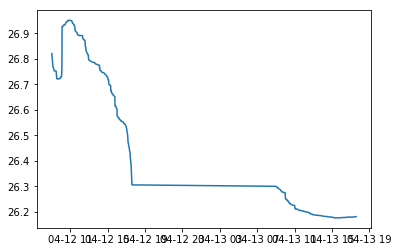

In [28]:
plt.plot( f['VWAP'] )